<a href="https://colab.research.google.com/github/Youngmi-Park/Coursera-DeepLearning.AI-TensorFlow-Developer/blob/main/Course1/2_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision
Computer vision: the field of having a computer understand and label what is present in an image.

사람은 쉽게 사물을 구분할 수 있지만, 컴퓨터는 어떻게 할까?
한 가지 방법으로는 많은 사진을 사용하여 컴퓨터에게 그것이 무엇인지 알려준 다음, 컴퓨터가 차이점을 보이는 패턴을 알아내게 하는 것이다.

**Fashion MNIST**

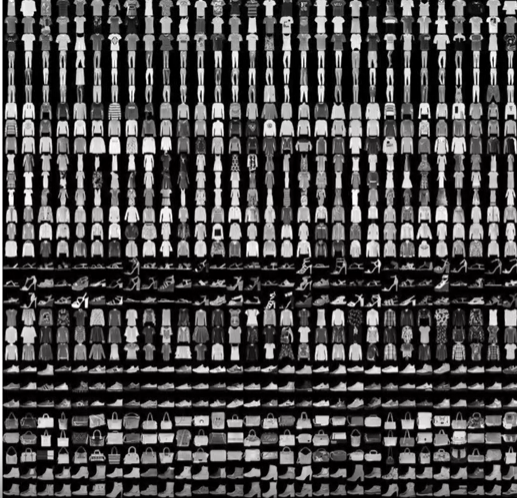
- 70k Images
- 10 Categories(different items of clothing)
- Images are 28x28, only 784 bytes(scaled down)
- gray scale
- pixel values from zero to 255 and one byte per pixel. 
- Can train a neural net

일반적으로 컴퓨터가 처리할 작업이 적기 때문에 이미지는 작을수록 좋지만 기능과 개체를 구별할 수 있도록 충분한 데이터가 필요하다.

실제 데이터는 다음과 같다.
- 이미지와 이미지 레이블을 가진다.
- boots, label=09 

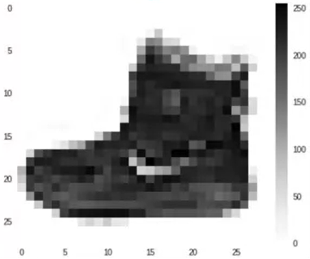

<br>

**레이블을 숫자로 표현하는 이유?**

- 컴퓨터는 텍스트보다 숫자를 더 잘 처리한다.
- 이것이 편견을 줄이는 데 도움이 될 수 있다. 언어에 상관없이 사용가능하다. 특정 언어로 된 단어로 레이블을 지정하고 해당 언어를 사용하지 않는 사람들을 배제하지 않는다.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
 # Keras 데이터베이스에서 로드하는 MNIST 유형의 개체 선언
 # Instantiate the dataset API
fashion_mnist = keras.datasets.fashion_mnist 

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # 4개의 객체 반환

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

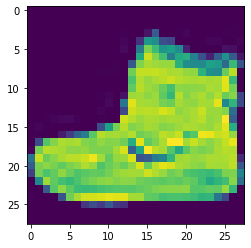

In [ ]:
plt.imshow(train_images[0])
print(train_images[0]) # raw values
print(train_labels[0])

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


이미지의 값은 0에서 255까지이지만 신경망은 정규화된 데이터에서 더 잘 작동한다. 모든 값을 255로 나누어 간단히 0과 1 사이 값으로 변경해준다.

In [ ]:
# Normalize the pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

신경망을 구축할 때 데이터 중 일부를 사용하여 신경망을 훈련하고 모델이 이미지를 얼마나 잘 인식하는지 테스트하기 위해 아직 보지 못한 유사한 데이터를 사용하는 것은 좋은 전략이다.
<br>
<br>
70,000개의 이미지 중 60,000개는 네트워크를 훈련하는 데 사용되며 이전에 본 적이 없는 10,000개의 이미지는 성능이 얼마나 좋은지 또는 얼마나 나쁜지를 테스트하는 데 사용할 수 있다.

## Design the model
3 층 neural network
- 첫번째 층: input_shape으로 입력 데이터의 모양을 지정해주고, Flatten은 28 x 28 정사각형을 가져와 간단한 선형 배열로 바꾼다.

- 두번째 층: hidden layer라고도 불린다. 128개 neuron을 가지고

- 마지막 층: 10개의 클래스를 가지고 있기 때문에 10개 neuron을 가진다.


In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

## Compile model and fitting
module 'tensorflow._api.v2.train' has no attribute 'AdamOptimizer'

tf.train.AdamOptimizer() → tf.optimizers.Adam()

목표는 이전과 같이 입력 데이터와 출력 데이터 사이의 관계가 무엇인지 추측하고 손실 함수를 사용하여 얼마나 잘 또는 얼마나 잘못했는지 측정하는 것이다.

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy')

In [ ]:
model.fit(train_images, train_labels, epochs=5) # train model, 5 epochs

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4734
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3592
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3211
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2964
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2801


학습은 25초 정도 걸리며 약 0.29의 손실로 끝난다. 즉, 이미지와 레이블 간의 관계를 추측하는 데 매우 정확하다고 할 수 있다.

**원하는 지점에 도달했을 때 어떻게 훈련을 중단할 수 있을까?** 
훈련 루프가 callback function을 지원한다. 그 시점에서 훈련을 취소할 수 있다.

## Creating a Callback class


In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss is low so cancelling training!")
      self.model.stop_training = True

In [ ]:
class myCallback2(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy')>0.6):

      # Stop if threshold is met
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback() # callback function 객체 생성
# Define the model
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(512, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks]) # callback function 추가

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4702
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.3576
Loss is low so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3575


In [ ]:
callbacks2 = myCallback2()
# Define the model
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model2.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=5, callbacks=[callbacks2]) # callback function 추가

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.4768 - accuracy: 0.8284
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4767 - accuracy: 0.8284


In [ ]:
classifications = model.predict(test_images)

In [ ]:
print(classifications[0])
print(np.argmax(classifications[0])) # label 9 반환

[4.9640617e-05 2.5586985e-07 1.3907928e-05 1.9652182e-06 9.2817363e-06
 3.1037521e-02 5.5905293e-05 2.1319091e-01 3.9671082e-04 7.5524396e-01]
9
